<a href="https://colab.research.google.com/github/JanLeyva/approach_TFM/blob/master/de_BUTD_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!nvidia-smi

Wed Aug 10 08:48:03 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.32.03    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   41C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## <font color='#A8EB15'> <b> Configuration and install repo <b>

In [1]:
!git clone https://github.com/PotatoSpudowski/py-bottom-up-attention.git
%cd py-bottom-up-attention

# Install python libraries
!pip install -r requirements.txt
!pip install 'git+https://github.com/cocodataset/cocoapi.git#subdirectory=PythonAPI'

# Install detectron2
!python setup.py build develop

Cloning into 'py-bottom-up-attention'...
remote: Enumerating objects: 1991, done.
remote: Total 1991 (delta 0), reused 0 (delta 0), pack-reused 1991
Receiving objects: 100% (1991/1991), 8.94 MiB | 23.24 MiB/s, done.
Resolving deltas: 100% (1231/1231), done.
/content/py-bottom-up-attention
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/facebookresearch/fvcore.git to /tmp/pip-req-build-xctqsdp2
  Running command git clone -q https://github.com/facebookresearch/fvcore.git /tmp/pip-req-build-xctqsdp2
     |████████████████████████████████| 753.4 MB 6.6 kB/s 
     |████████████████████████████████| 4.0 MB 55.2 MB/s 
     |████████████████████████████████| 596 kB 71.9 MB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
  Created wheel for fvcore: filename=fvcore-0.1.5-py3-none-any.whl size=65332 sha256=157d345526a62db3ac5172fe32c9f283537efc930aafeb83d932979907ca76ba
  Stored in directory: /tmp/pip-ephe

## <font color='#A8EB15'> <b> Download and Unzip Dataset </b>

In [2]:
import os
home = "/content"
os.chdir(home)

In [3]:
%%time 
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1B5kwn6IW28M03tlOoUdJQ1jFRgSyK6Ya' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1B5kwn6IW28M03tlOoUdJQ1jFRgSyK6Ya" -O hateful_memes.zip && rm -rf /tmp/cookies.txt

--2022-08-12 07:33:30--  https://docs.google.com/uc?export=download&confirm=t&id=1B5kwn6IW28M03tlOoUdJQ1jFRgSyK6Ya
Resolving docs.google.com (docs.google.com)... 74.125.195.101, 74.125.195.102, 74.125.195.113, ...
Connecting to docs.google.com (docs.google.com)|74.125.195.101|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0c-44-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8g123tb8rl210dspvjpuuuv1db3rdcui/1660289550000/01761641334275034120/*/1B5kwn6IW28M03tlOoUdJQ1jFRgSyK6Ya?e=download&uuid=d3c64cf0-a009-43da-91e4-38adabafbe59 [following]
--2022-08-12 07:33:30--  https://doc-0c-44-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/8g123tb8rl210dspvjpuuuv1db3rdcui/1660289550000/01761641334275034120/*/1B5kwn6IW28M03tlOoUdJQ1jFRgSyK6Ya?e=download&uuid=d3c64cf0-a009-43da-91e4-38adabafbe59
Resolving doc-0c-44-docs.googleusercontent.com (doc-0c-44-docs.googleusercontent.com)... 74.125.197.132, 

In [4]:
os.chdir("/content")

In [5]:
!unzip -P pass hateful_memes.zip

Se han truncado las últimas 5000 líneas del flujo de salida.
  inflating: hateful_memes/img/91574.png  
  inflating: hateful_memes/img/30549.png  
  inflating: hateful_memes/img/24570.png  
  inflating: hateful_memes/img/50734.png  
  inflating: hateful_memes/img/85073.png  
  inflating: hateful_memes/img/65371.png  
  inflating: hateful_memes/img/79305.png  
  inflating: hateful_memes/img/56972.png  
  inflating: hateful_memes/img/14329.png  
  inflating: hateful_memes/img/07685.png  
  inflating: hateful_memes/img/69823.png  
  inflating: hateful_memes/img/37095.png  
  inflating: hateful_memes/img/45201.png  
  inflating: hateful_memes/img/96435.png  
  inflating: hateful_memes/img/35701.png  
  inflating: hateful_memes/img/48106.png  
  inflating: hateful_memes/img/17963.png  
  inflating: hateful_memes/img/72046.png  
  inflating: hateful_memes/img/26983.png  
  inflating: hateful_memes/img/27810.png  
  inflating: hateful_memes/img/76045.png  
  inflating: hateful_memes/img/07865

In [6]:
!rm hateful_memes.zip

## <font color='#A8EB15'> <b> Detectron 2 config  <font color='#FF9C33'> REMEMBER to restart execution env </b>

In [12]:
import os
import io

import detectron2

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# import some common libraries
import numpy as np
import cv2
import torch

# Show the image in ipynb
from IPython.display import clear_output, Image, display
import PIL.Image
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

In [25]:
cfg = get_cfg()
cfg.merge_from_file("/content/py-bottom-up-attention/configs/VG-Detection/faster_rcnn_R_101_C4_attr_caffemaxpool.yaml")
cfg.MODEL.RPN.POST_NMS_TOPK_TEST = 300
cfg.MODEL.ROI_HEADS.NMS_THRESH_TEST = 0.6
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.2
# VG Weight
cfg.MODEL.WEIGHTS = "http://nlp.cs.unc.edu/models/faster_rcnn_from_caffe_attr.pkl"
predictor = DefaultPredictor(cfg)

Modifications for VG in ResNet Backbone (modeling/backbone/resnet.py):
	Using pad 0 in stem max_pool instead of pad 1.

Modifications for VG in RPN (modeling/proposal_generator/rpn.py):
	Use hidden dim 512 instead fo the same dim as Res4 (1024).

Modifications for VG in RoI heads (modeling/roi_heads/roi_heads.py):
	1. Change the stride of conv1 and shortcut in Res5.Block1 from 2 to 1.
	2. Modifying all conv2 with (padding: 1 --> 2) and (dilation: 1 --> 2).
	For more details, please check 'https://github.com/peteanderson80/bottom-up-attention/blob/master/models/vg/ResNet-101/faster_rcnn_end2end_final/test.prototxt'.

Modifications for VG in RoI heads (modeling/roi_heads/fast_rcnn.py))
	Embedding: 1601 --> 256	Linear: 2304 --> 512	Linear: 512 --> 401



In [3]:
import pandas as pd

test1 = pd.read_json('/content/hateful_memes/test_seen.jsonl', lines=True)
test2 = pd.read_json('/content/hateful_memes/test_unseen.jsonl', lines=True)
train = pd.read_json('/content/hateful_memes/train.jsonl', lines=True)
dev1 = pd.read_json('/content/hateful_memes/dev_seen.jsonl', lines=True)
dev2 = pd.read_json('/content/hateful_memes/dev_unseen.jsonl', lines=True)

frames = [test1, test2, train, dev1, dev2]

df = pd.concat(frames)

In [4]:
image_list = df['img'].unique()

In [5]:
if not os.path.exists('BUTD_features'):
    os.makedirs('BUTD_features')

## <font color='#A8EB15'> <b> Extract Features </b>

In [24]:
import re
import numpy as np
from tqdm.notebook import tqdm

from detectron2.modeling.postprocessing import detector_postprocess
from detectron2.modeling.roi_heads.fast_rcnn import FastRCNNOutputLayers, FastRCNNOutputs, fast_rcnn_inference_single_image

In [7]:
def extract_features(raw_image):
    NUM_OBJECTS = 100 # we change NUM_OBJECTS from 36 to 100

    with torch.no_grad():
        raw_height, raw_width = raw_image.shape[:2]
        
        # Preprocessing
        image = predictor.transform_gen.get_transform(raw_image).apply_image(raw_image)
        image = torch.as_tensor(image.astype("float32").transpose(2, 0, 1))
        inputs = [{"image": image, "height": raw_height, "width": raw_width}]
        images = predictor.model.preprocess_image(inputs)
        
        # Run Backbone Res1-Res4
        features = predictor.model.backbone(images.tensor)
        
        # Generate proposals with RPN
        proposals, _ = predictor.model.proposal_generator(images, features, None)
        proposal = proposals[0]
        # print('Proposal Boxes size:', proposal.proposal_boxes.tensor.shape)
        
        # Run RoI head for each proposal (RoI Pooling + Res5)
        proposal_boxes = [x.proposal_boxes for x in proposals]
        features = [features[f] for f in predictor.model.roi_heads.in_features]
        box_features = predictor.model.roi_heads._shared_roi_transform(
            features, proposal_boxes
        )
        feature_pooled = box_features.mean(dim=[2, 3])  # pooled to 1x1
        # print('Pooled features size:', feature_pooled.shape)
        
        # Predict classes and boxes for each proposal.
        pred_class_logits, pred_attr_logits, pred_proposal_deltas = predictor.model.roi_heads.box_predictor(feature_pooled)
        outputs = FastRCNNOutputs(
            predictor.model.roi_heads.box2box_transform,
            pred_class_logits,
            pred_proposal_deltas,
            proposals,
            predictor.model.roi_heads.smooth_l1_beta,
        )
        probs = outputs.predict_probs()[0]
        boxes = outputs.predict_boxes()[0]
        
        attr_prob = pred_attr_logits[..., :-1].softmax(-1)
        max_attr_prob, max_attr_label = attr_prob.max(-1)
        
        # Note: BUTD uses raw RoI predictions,
        #       we use the predicted boxes instead.
        # boxes = proposal_boxes[0].tensor    
        
        # NMS
        for nms_thresh in np.arange(0.5, 1.0, 0.1):
            instances, ids = fast_rcnn_inference_single_image(
                boxes, probs, image.shape[1:], 
                score_thresh=0.01, nms_thresh=nms_thresh, topk_per_image=NUM_OBJECTS
            )
            if len(ids) == NUM_OBJECTS:
                break

                
        instances = detector_postprocess(instances, raw_height, raw_width)
        roi_features = feature_pooled[ids].detach()
        max_attr_prob = max_attr_prob[ids].detach()
        max_attr_label = max_attr_label[ids].detach()
        instances.attr_scores = max_attr_prob
        instances.attr_classes = max_attr_label
        
        boxes = instances.pred_boxes
        boxes = list(boxes)
        boxes = [element.tolist() for element in boxes]
        boxes = np.array(boxes)

        features = np.array(roi_features.tolist())
        
        return boxes, features, (raw_height, raw_width)

In [8]:
for image_path in tqdm(image_list):
    result = re.search('/(.*).png', image_path)
    img_id = result.group(1)

    image = 'hateful_memes/'+image_path
    im = cv2.imread(image)

    boxes,features, size = extract_features(im)
    if boxes.shape != (100, 4):
        print(img_id, boxes.shape)
    return_dic = {
        'boxes': boxes,
        'features':features,
        'size':size
    }

    np.save("BUTD_features/"+img_id+".npy", return_dic) 

  0%|          | 0/12140 [00:00<?, ?it/s]

In [ ]:
!zip -r BUTD_features.zip BUTD_features

## <font color='#A8EB15'> <b> Visualize </b>

In [5]:
#@title visualize function
NUM_OBJECTS = 36

from torch import nn

from detectron2.modeling.postprocessing import detector_postprocess
from detectron2.modeling.roi_heads.fast_rcnn import FastRCNNOutputLayers, FastRCNNOutputs, fast_rcnn_inference_single_image
from detectron2.structures.boxes import Boxes
from detectron2.structures.instances import Instances

def doit(raw_image, raw_boxes):
        # Process Boxes
    raw_boxes = Boxes(torch.from_numpy(raw_boxes).cuda())
    
    with torch.no_grad():
        raw_height, raw_width = raw_image.shape[:2]
        print("Original image size: ", (raw_height, raw_width))
        
        # Preprocessing
        image = predictor.transform_gen.get_transform(raw_image).apply_image(raw_image)
        print("Transformed image size: ", image.shape[:2])
        
        # Scale the box
        new_height, new_width = image.shape[:2]
        scale_x = 1. * new_width / raw_width
        scale_y = 1. * new_height / raw_height
        #print(scale_x, scale_y)
        boxes = raw_boxes.clone()
        boxes.scale(scale_x=scale_x, scale_y=scale_y)
        
        # ----
        image = torch.as_tensor(image.astype("float32").transpose(2, 0, 1))
        inputs = [{"image": image, "height": raw_height, "width": raw_width}]
        images = predictor.model.preprocess_image(inputs)
        
        # Run Backbone Res1-Res4
        features = predictor.model.backbone(images.tensor)
        
        # Run RoI head for each proposal (RoI Pooling + Res5)
        proposal_boxes = [boxes]
        features = [features[f] for f in predictor.model.roi_heads.in_features]
        box_features = predictor.model.roi_heads._shared_roi_transform(
            features, proposal_boxes
        )
        feature_pooled = box_features.mean(dim=[2, 3])  # pooled to 1x1
        print('Pooled features size:', feature_pooled.shape)
        
        # Predict classes        pred_class_logits, pred_proposal_deltas = predictor.model.roi_heads.box_predictor(feature_pooled) and boxes for each proposal.
        pred_class_logits, pred_attr_logits, pred_proposal_deltas = predictor.model.roi_heads.box_predictor(feature_pooled)
        pred_class_prob = nn.functional.softmax(pred_class_logits, -1)
        pred_scores, pred_classes = pred_class_prob[..., :-1].max(-1)
        
        attr_prob = pred_attr_logits[..., :-1].softmax(-1)
        max_attr_prob, max_attr_label = attr_prob.max(-1)
        
        # Detectron2 Formatting (for visualization only)
        roi_features = feature_pooled
        instances = Instances(
            image_size=(raw_height, raw_width),
            pred_boxes=raw_boxes,
            scores=pred_scores,
            pred_classes=pred_classes,
            attr_scores = max_attr_prob,
            attr_classes = max_attr_label
        )
        
        return instances, roi_features

In [75]:
!ls hateful_memes/img

01235.png  14603.png  28639.png  42387.png  57132.png  71305.png  85196.png
01236.png  14620.png  28641.png  42389.png  57134.png  71308.png  85204.png
01243.png  14625.png  28657.png  42391.png  57142.png  71309.png  85209.png
01245.png  14632.png  28659.png  42398.png  57146.png  71320.png  85213.png
01247.png  14650.png  28670.png  42501.png  57148.png  71325.png  85216.png
01256.png  14652.png  28674.png  42503.png  57160.png  71340.png  85219.png
01258.png  14657.png  28690.png  42507.png  57162.png  71348.png  85237.png
01264.png  14658.png  28691.png  42509.png  57164.png  71352.png  85239.png
01268.png  14672.png  28695.png  42510.png  57169.png  71354.png  85243.png
01269.png  14673.png  28704.png  42530.png  57180.png  71358.png  85261.png
01274.png  14675.png  28716.png  42538.png  57183.png  71360.png  85267.png
01275.png  14679.png  28731.png  42567.png  57189.png  71364.png  85269.png
01276.png  14682.png  28735.png  42568.png  57193.png  71365.png  85271.png
01278.png  1

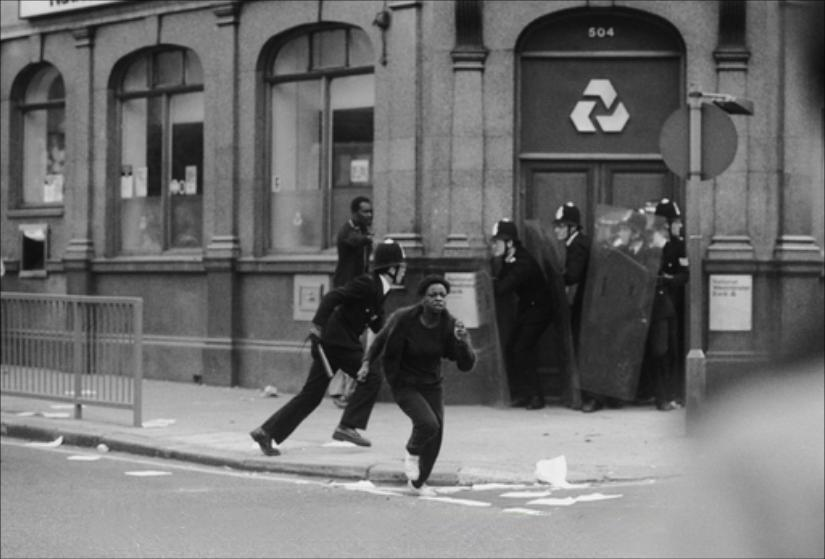

In [103]:
# show original img
im = cv2.imread("hateful_memes/img/98542.png")
im_rgb = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
showarray(im_rgb)
import numpy as np
feature1472 = np.load("BUTD_features/98542.npy", allow_pickle=True)
feature1472=feature1472.tolist()
given_boxes = feature1472['boxes']

In [104]:
given_boxes=given_boxes[:36]

In [105]:
instances, features = doit(im, given_boxes)
print("Classes", instances.pred_classes)

Original image size:  (559, 825)
Transformed image size:  (800, 1181)
Pooled features size: torch.Size([36, 2048])
Classes tensor([177, 540, 177, 177, 177, 453, 453, 177, 453, 177, 540,  50, 540, 128,
         50, 128, 236, 177, 540, 177, 308, 364,  50, 308, 364, 397, 177, 308,
        181, 364, 177, 715, 181, 308, 453, 308], device='cuda:0')


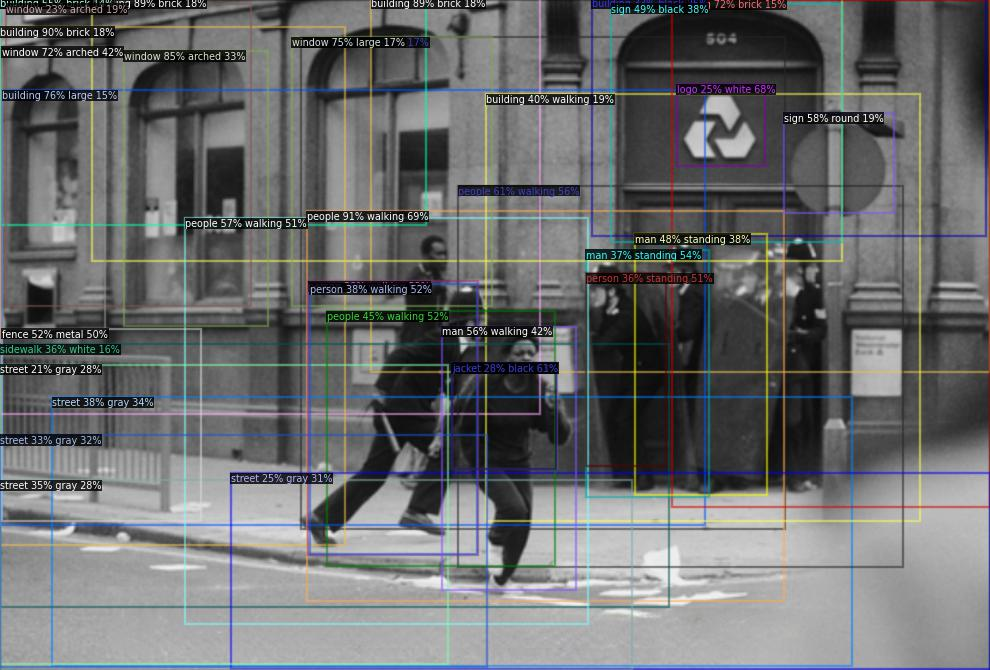

In [106]:
# Show the boxes, labels, and features


pred = instances.to('cpu')
v = Visualizer(im[:, :, :], MetadataCatalog.get("vg"), scale=1.2)
v = v.draw_instance_predictions(pred)
showarray(v.get_image()[:, :, ::-1])
#

In [86]:
NUM_OBJECTS = 36

from torch import nn

from detectron2.modeling.postprocessing import detector_postprocess
from detectron2.modeling.roi_heads.fast_rcnn import FastRCNNOutputLayers, FastRCNNOutputs, fast_rcnn_inference_single_image
from detectron2.structures.boxes import Boxes
from detectron2.structures.instances import Instances

import os
import io

import detectron2

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# import some common libraries
import numpy as np
import cv2
import torch

# Show the image in ipynb
from IPython.display import clear_output, Image, display
import PIL.Image

import os
import io

import detectron2

# import some common detectron2 utilities
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

# import some common libraries
import numpy as np
import cv2
import torch

# Show the image in ipynb
from IPython.display import clear_output, Image, display
import PIL.Image
def showarray(a, fmt='jpeg'):
    a = np.uint8(np.clip(a, 0, 255))
    f = io.BytesIO()
    PIL.Image.fromarray(a).save(f, fmt)
    display(Image(data=f.getvalue()))

In [66]:
# Load VG Classes
data_path = 'py-bottom-up-attention/demo/data/genome/1600-400-20'

vg_classes = []
with open(os.path.join(data_path, 'objects_vocab.txt')) as f:
    for object in f.readlines():
        vg_classes.append(object.split(',')[0].lower().strip())

vg_attrs = []
with open(os.path.join(data_path, 'attributes_vocab.txt')) as f:
    for object in f.readlines():
        vg_attrs.append(object.split(',')[0].lower().strip())


MetadataCatalog.get("vg").thing_classes = vg_classes
MetadataCatalog.get("vg").attr_classes = vg_attrs

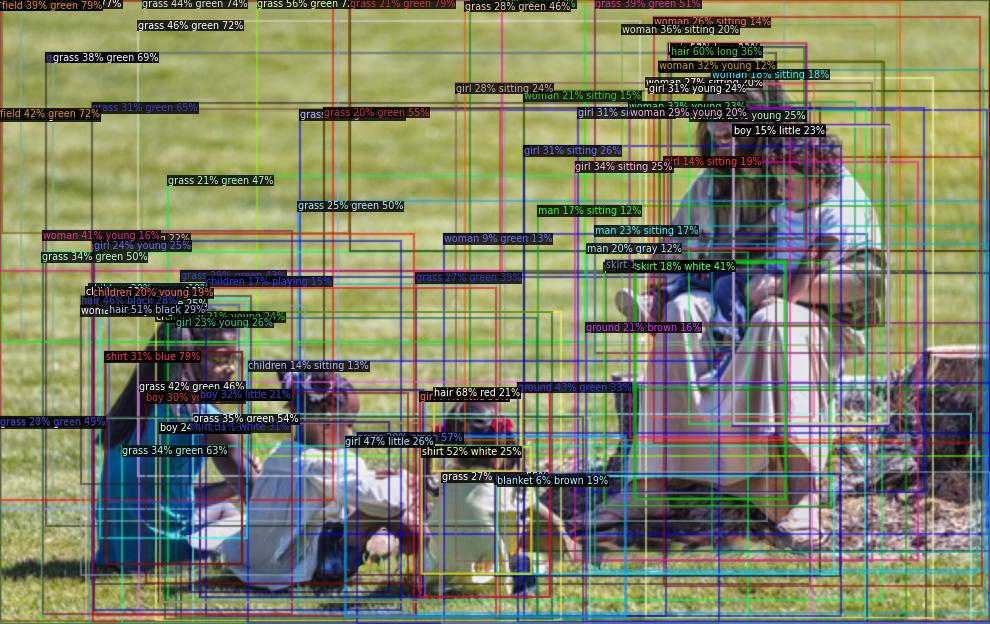

In [73]:
# Show the boxes, labels, and features


pred = instances.to('cpu')
v = Visualizer(im[:, :, :], MetadataCatalog.get("vg"), scale=1.2)
v = v.draw_instance_predictions(pred)
showarray(v.get_image()[:, :, ::-1])
#

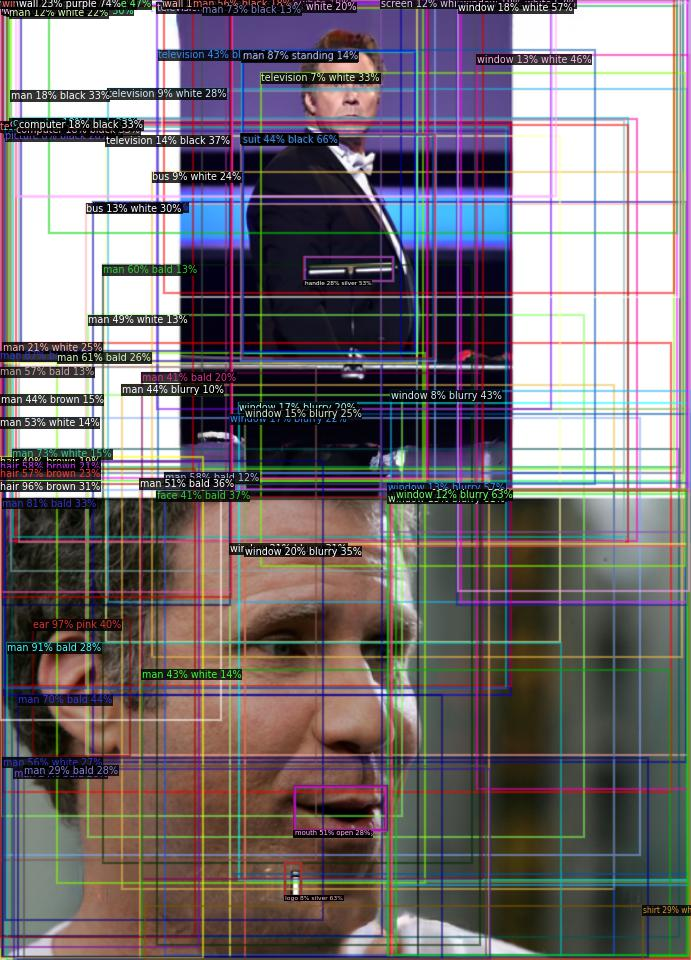

instances:
 Instances(num_instances=100, image_height=800, image_width=576, fields=[pred_boxes, scores, pred_classes, attr_scores, attr_classes])

boxes:
 Boxes(tensor([[2.7262e+01, 5.1689e+02, 1.0831e+02, 6.3024e+02],
        [0.0000e+00, 4.0178e+02, 1.8434e+02, 6.0054e+02],
        [6.0920e+00, 5.3647e+02, 4.6721e+02, 8.0000e+02],
        [3.7611e-01, 2.9342e+02, 3.1870e+02, 7.7970e+02],
        [2.0256e+02, 4.3775e+01, 3.4613e+02, 2.9404e+02],
        [1.0346e+01, 3.7504e+02, 5.6542e+02, 7.8051e+02],
        [8.5677e+01, 2.2176e+02, 3.9331e+02, 7.1896e+02],
        [1.6858e+02, 5.3276e+00, 3.9606e+02, 4.1562e+02],
        [2.4549e+02, 6.5498e+02, 3.2221e+02, 6.9280e+02],
        [2.0249e+02, 1.1330e+02, 3.6120e+02, 2.9996e+02],
        [1.3183e+02, 4.2813e+01, 4.9615e+02, 4.0380e+02],
        [0.0000e+00, 3.9127e+02, 1.6237e+02, 7.8051e+02],
        [1.3045e+02, 4.1006e+02, 4.0024e+02, 7.8773e+02],
        [1.1664e+02, 3.9969e+02, 4.0764e+02, 7.9902e+02],
        [2.5350e+02, 2.1505

In [51]:
# Show the boxes, labels, and features
# with 36 fatures
NUM_OBJECTS = 36
pred = instances.to('cpu')
v = Visualizer(im[:, :, :], MetadataCatalog.get("vg"), scale=1.2)
v = v.draw_instance_predictions(pred)
showarray(v.get_image()[:, :, ::-1])
print('instances:\n', instances)
print()
print('boxes:\n', instances.pred_boxes)
print()
print('Shape of features:\n', features.shape)

In [32]:
!cp 'BUTD_features.zip' '/content/drive/My Drive/features_py_bottom/'

## <font color='#A8EB15'> <b> Convert features to lmbd </b>

In [ ]:
import argparse
import glob
import os
import pickle

import lmdb
import numpy as np
import tqdm


class LMDBConversion():
    def __init__(self, features_folder, lmdb_path):
        self.features_folder = features_folder
        self.lmdb_path = lmdb_path

    def convert(self):
        env = lmdb.open(self.lmdb_path, map_size=1099511627776)
        id_list = []
        features = glob.glob(
            os.path.join(self.features_folder, "**", "*.npy"), recursive=True
        )


        with env.begin(write=True) as txn:
            for infile in tqdm.tqdm(features):
                reader = np.load(infile, allow_pickle=True)
                item = {}
                split = os.path.relpath(infile, self.features_folder).split(
                    ".npy"
                )[0]
                item["feature_path"] = split
                key = split.encode()
                id_list.append(key)

                item["features"] = reader.item().get("features")
                item["image_height"] = reader.item().get("image_height")
                item["image_width"] = reader.item().get("image_width")
                item["num_boxes"] = reader.item().get("num_boxes")
                item["objects"] = reader.item().get("objects")
                item["cls_prob"] = reader.item().get("cls_prob", None)
                item["bbox"] = reader.item().get("bbox")

                txn.put(key, pickle.dumps(item))

            txn.put(b"keys", pickle.dumps(id_list))


In [ ]:
import os
os.mkdir("/content/features")

In [ ]:
features_folder = '/content/BUTD_features/'
lmdb_path = "/content/features"
lmdb_converter = LMDBConversion(features_folder, lmdb_path)
lmdb_converter.convert()

100%|██████████| 12140/12140 [02:08<00:00, 94.73it/s]


In [ ]:
#https://drive.google.com/file/d/1rZ5ErbTbR1xxiThUvuT9QNP6HyvazthQ/view?usp=sharing

In [ ]:
np.load("BUTD_features/14072.npy", allow_pickle=True)

array({'boxes': array([[2.72620735e+01, 5.16887695e+02, 1.08312019e+02, 6.30243469e+02],
       [0.00000000e+00, 4.01776978e+02, 1.84337036e+02, 6.00543152e+02],
       [6.09202909e+00, 5.36472534e+02, 4.67205841e+02, 8.00000000e+02],
       [3.76105964e-01, 2.93419647e+02, 3.18701660e+02, 7.79700867e+02],
       [2.02555099e+02, 4.37748451e+01, 3.46134399e+02, 2.94043243e+02],
       [1.03461990e+01, 3.75037811e+02, 5.65423950e+02, 7.80507385e+02],
       [8.56774521e+01, 2.21757095e+02, 3.93308685e+02, 7.18960083e+02],
       [1.68576813e+02, 5.32756186e+00, 3.96062958e+02, 4.15621857e+02],
       [2.45492416e+02, 6.54975220e+02, 3.22209015e+02, 6.92797913e+02],
       [2.02492004e+02, 1.13304062e+02, 3.61195251e+02, 2.99956818e+02],
       [1.31833359e+02, 4.28127403e+01, 4.96154297e+02, 4.03795868e+02],
       [0.00000000e+00, 3.91268127e+02, 1.62368713e+02, 7.80505859e+02],
       [1.30450256e+02, 4.10063629e+02, 4.00237183e+02, 7.87726440e+02],
       [1.16639488e+02, 3.99686920e

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!zip -r BUTD_features.zip features

  adding: features/ (stored 0%)
  adding: features/data.mdb (deflated 55%)
  adding: features/lock.mdb (deflated 99%)


In [ ]:
!cp 'BUTD_features.zip' '/content/drive/My Drive/features_BUTD/'

In [ ]:
!gzip -r -k -v features

features/data.mdb:	 55.5% -- replaced with features/data.mdb.gz
features/lock.mdb:	 99.1% -- replaced with features/lock.mdb.gz


In [ ]:
!cp 'features/data.mdb.gz' '/content/drive/My Drive/features_BUTD/'

In [ ]:
!cp 'features/lock.mdb.gz' '/content/drive/My Drive/features_BUTD/'

In [ ]:
!python mdb_dump -V features

python3: can't open file 'mdb_dump': [Errno 2] No such file or directory


In [ ]:
!pip install lmdb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir features_gz